In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"
import tensorflow as tf
from rl_agent import QAgent
import gym
from config import Config

In [ ]:
def build_model(action_shape):
    model = tf.keras.Sequential()
    model.add(Embedding(500, 10, input_length=1))
    model.add(Reshape((10,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(action_shape, activation='linear'))
    return model

In [2]:
env = gym.make("Taxi-v3").env
RANDOM_SEED = 5
config = "/home/guillaume/src/rl/config.yaml"
model = build_model(env.action_space.n)
agent = QAgent(env=env, config=config, model=model)

In [3]:
agent.compile()

In [4]:
agent.fit()

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [5]:
agent.evaluate(max_steps=100)

  0%|          | 0/100 [00:00<?, ?it/s]

Results after 100 episodes:
Average timesteps per episode: 100.0
Average penalties per episode: 0.0


In [17]:
agent.play(verbose=True, max_steps=15, sleep=0.1)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
Iter: 15 - Action: 0(South) - Reward -1
cannot converge :(


In [19]:
# Passenger locations:
#     - 0: R(ed)
#     - 1: G(reen)
#     - 2: Y(ellow)
#     - 3: B(lue)
#     - 4: in taxi
# Destinations:
#     - 0: R(ed)
#     - 1: G(reen)
#     - 2: Y(ellow)
#     - 3: B(lue)
# Actions:
#     There are 6 discrete deterministic actions:
#     - 0: move south
#     - 1: move north
#     - 2: move east
#     - 3: move west
#     - 4: pickup passenger
#     - 5: drop off passenger
state = env.encode(3, 1, 2, 0) # (taxi row, taxi column, passenger index, destination index)
env.s = state
env.render()
state
# env.step(5)
# env.step(5)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)


328

In [48]:
import matplotlib.pyplot as plt

In [17]:
import numpy as np

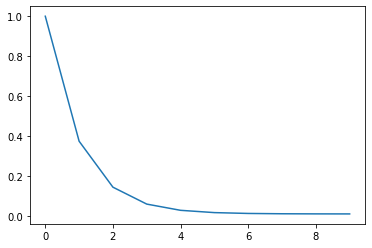

In [25]:
x = np.arange(10)
y = 0.01 + 0.99 * np.exp(-x)
plt.plot(x, y)
plt.show();